&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'

# 15. Deep Learning

# Objectives 
* What a **neural network** is and how it enables **deep learning**
* Create **Keras neural networks**
* Keras **layers**, **activation functions**, **loss functions** and **optimizers**
* Use a Keras **convolutional neural network (CNN)** trained on the **MNIST dataset** to build a computer vision application that **recognizes handwritten digits** 
* Use a Keras **recurrent neural network (RNN)** trained on the **IMDb dataset** to create a sentiment analysis application that performs **binary classification** of **positive and negative movie reviews**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.1 Introduction
* **Deep learning**&mdash;powerful subset of **machine learning** 
* Has produced impressive results in **computer vision** and many other areas 
* **Resource-intensive deep-learning solutions** are possible due to 
    * **big data**
    * **significant processor power**
    * **faster Internet speeds** 
    * advancements in **parallel computing hardware and software** 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Keras and TensorFlow
* **Keras** offers a friendly interface to Google’s **TensorFlow**—the most widely used deep-learning library
    * Also works with Microsoft’s **CNTK** and others
* **François Chollet** of the **Google Mind team** developed **Keras** to make deep-learning capabilities **more accessible**
    * His book [**_Deep Learning with Python_**](https://amzn.to/303gknb) is a must read
* **Google has thousands of deep learning projects** internally &mdash; that number is growing quickly [\[1\]](http://theweek.com/speedreads/654463/google-more-than-1000-artificial-intelligence-projects-works), [\[2\]](https://www.zdnet.com/article/google-says-exponential-growth-of-ai-is-changing-nature-of-compute/)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Models 
* **Deep learning models** connect multiple **layers**
* Models **encapsulate sophisticated mathematical algorithms**
    * You simply define, parameterize and manipulate objects
* In general, **more data** leads to **better trained deep learning models**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Processing Power
* **Deep learning** can require **significant processing power**
* Training models on **big-data** can take **hours**, **days** or **more** 
* High-performance **GPUs** and **TPUs (Tensor Processing Units)** developed by **NVIDIA** and **Google** typically used to meet extraordinary processing demands of deep-learning applications
* Our examples can be **trained in minutes to just less than an hour** on **conventional CPUs**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.1.1 Deep Learning Applications
| <span class="width:50%">&nbsp;</span> | &nbsp;
| :--- | :--- |
| Game playing | Computer vision: Object, pattern and facial recognition |
| Self-driving cars | Robotics |
| Improving customer experiences | Chatbots |
| Diagnosing medical conditions | Google Search |
| Facial recognition | Automated image captioning and video closed captioning |
| Enhancing image resolution | Speech synthesis and recognition |
| Language translation | Predicting election results |
| Predicting earthquakes and weather | Google Sunroof to determine whether you can put solar panels on your roof |
| <br>**_Generative applications_** | &nbsp; |
| Generating original images | Processing existing images to look like a specified artist’s style
| Adding color to black-and-white images and video | Creating music
| Creating text (books, poetry) | Much more.

<hr style="height:2px; border:none; color:black; background-color:black;"> 

# 15.3 Custom Anaconda Environments
* We use **TensorFlow's built-in version of Keras**
* The version of TensorFlow we used requires **Python 3.6.x** 
    * Recently released TensorFlow 2.0 supports Python 3.7 
* Easy to set up **custom environment** for Keras and TensorFlow
    * Helps with **reproducibility** if code depends on specific Python or library versions
    * Details in my [**Python Fundamentals LiveLessons videos**](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_06) and in [**Python for Programmers, Section 15.3**](https://learning.oreilly.com/library/view/Python+for+Programmers,+First+Edition/9780135231364/ch15.xhtml#ch15lev1sec3)    
* Preconfigured **Docker**: [**`jupyter/tensorflow-notebook`**](https://hub.docker.com/r/jupyter/tensorflow-notebook/)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Creating/Activating/Deactivating an Anaconda Environment
```
conda create -n tf_env python=3.6 anaconda tensorflow 
ipython jupyterlab scikit-learn matplotlib seaborn h5py 
pydot graphviz nodejs
```

* Computers with **Tensorflow-compatible NVIDIA GPUs**: [Replace `tensorflow` with **`tensorflow-gpu`** for better performance](https://www.tensorflow.org/install/gpu)
* Activate the custom environment
> ```
conda activate tf_env
```
* Deactivate the custom environment
>```
conda deactivate
``` 


<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.4 Neural Networks
* Deep learning uses **artificial neural networks** to learn
* Similar to how scientists believe our **brains** work

<hr style="height:2px; border:none; color:black; background-color:black;">

### Artificial Neural Network Diagram
* The following diagram shows a three-**layer** artifical neural network
* **Circles** represent **neurons**, **lines** between them simulate **synapses**&mdash;brain's connections between neurons
* Output from one neuron becomes input to another
* Diagram of a **fully connected network**
    * Not all neural networks are fully connected
    
![Three-layer, fully connected neural network](./ch15images/neuralnet.png "Three-layer, fully connected neural network")

<hr style="height:2px; border:none; color:black; background-color:black;">

### How Artificial Neurons Decide Whether to Activate Synapses (1 of 3)
* During **training**, the network calculates **weights** for every **connection** between the **neurons in one layer** and **those in the next**
* On a **neuron-by-neuron basis**, each of its **inputs** is **multiplied by** that **connection’s weight**
* **Sum** of those weighted inputs is passed to the neuron’s **activation function**
* **Activation function’s output** determines **which neurons to activate** based on the **inputs**—just like neurons in your brain respond to inputs from your senses

<hr style="height:2px; border:none; color:black; background-color:black;">

### How Artificial Neurons Decide Whether to Activate Synapses (2 of 3)
* Diagram of a **neuron** receiving three **inputs** (black dots) and producing an **output** (hollow circle) that would be passed to all or some of neurons in the next layer, depending on the types of the neural network’s layers

![Neuron receiving three inputs (the black dots) and producing an output (the hollow circle) that would be passed to all or some of neurons in the next layer, depending on the types of the neural network’s layers](./ch15images/neuron.png "Neuron receiving three inputs (the black dots) and producing an output (the hollow circle) that would be passed to all or some of neurons in the next layer, depending on the types of the neural network’s layers")
* **w1**, **w2** and **w3** are **weights**
* In a **new model** that you train from scratch, these **values** are **initialized randomly** by the model

<hr style="height:2px; border:none; color:black; background-color:black;">

### How Artificial Neurons Decide Whether to Activate Synapses (3 of 3)
* As the network **trains**, tries to **minimize error rate** between **network’s predicted labels** and **samples’ actual labels**
* **Error rate** is known as the **loss**
* **Calculation** that determines the **loss** is the **loss function**
* **Backpropagation**&mdash;**During training**, the network determines the **amount that each neuron contributes to the loss**, then **adjusts the weights** throughout the layers in an effort to **minimize that loss**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.5 Tensors 
* Deep learning frameworks manipulate data in **tensors** &mdash; similar to **multidimensional arrays**
    * Used to perform calculations that enable neural networks to learn
* **Tensors** can **quickly become enormous** based on **number of dimensions** and **richness** of the data (e.g., images, audios and videos are richer than text)
    * Manipulating them efficiently is crucial 
* For an **overview of 0D to 5D tensors** and what they might represent, see 
    * [**Python Fundamentals LiveLessons videos**](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_08) 
    * [**Python for Programmers, Section 15.7**](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch15.xhtml#ch15lev1sec5)

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.6 Convolutional Neural Networks for Vision; Multi-Classification with the MNIST Dataset (1 of 2)
* **`MNIST` database of handwritten digits**
    * “The MNIST Database.” MNIST Handwritten Digit Database, Yann LeCun, Corinna Cortes and Chris Burges. http://yann.lecun.com/exdb/mnist/.
* Create a [**convolutional neural network**](https://en.wikipedia.org/wiki/Convolutional_neural_network) (also called a **convnet** or **CNN**)
* Common in **computer-vision applications**
    * Recognizing handwritten digits and characters
    * Recognizing objects in images and video
    * Self-driving cars
* **Non-vision applications**
    * natural-language processing 
    * recommender systems
    * much more

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.6 Convolutional Neural Networks for Vision; Multi-Classification with the MNIST Dataset (2 of 2)
* **60,000** labeled digit image samples for **training**, **10,000** for testing
* **28-by-28 pixel images** (**784 features**), represented as **NumPy arrays**
* **Grayscale pixel intensity** (shade) values **0-255** 
* **Convnet** will perform [**probabilistic classification**](https://en.wikipedia.org/wiki/Probabilistic_classification)
	* Model will output **10 probabilities** indicating likelihood a digit is **0-9**
	* **Highest probability** is the **predicted value**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Reproducibility in Keras and Deep Learning
* **Reproducibility is difficult** because the libraries **heavily parallelize floating-point calculations** 
* Each time calculations execute, they may execute in a **different order**
* Can produce **different results** in each execution
* See the [**Keras FAQ on reproducibility**](https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Components of a Keras Neural Network 
* **Network** (also called a **model**)
    * Sequence of layers containing the neurons used to learn from the samples
    * Each layer’s neurons receive inputs, process them (via an **activation function**) and produce outputs
    * The more layers you **stack**, the **deeper** the network is, hence the term **deep learning**
* **Loss function**
    * Produces a measure of **how well the network predicts target values** 
    * **Lower loss values** indicate **better predictions**
* **Optimizer**
    * Attempts to **minimize the values produced by the loss function** to **tune the network** to make better predictions 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.1 Loading the MNIST Dataset

In [2]:
from tensorflow.keras.datasets import mnist

/Users/pauldeitel/anaconda3/envs/tf_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/pauldeitel/anaconda3/envs/tf_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/pauldeitel/anaconda3/envs/tf_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/pauldeitel/anaconda3/env

* **`load_data` function** loads **training** and **testing sets**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.2 Data Exploration
* Check dimensions of the **training set images (`X_train`)**, **training set labels (`y_train`)**, **testing set images (`X_test`)** and **testing set labels (`y_test`)**:

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing Digits—Display 24 MNIST Training Set Images (1 of 2)

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing Digits—Display 24 MNIST Training Set Images (2 of 2)
* Run cell several times to view different digits and see **why handwritten digit recognition is a challenge**

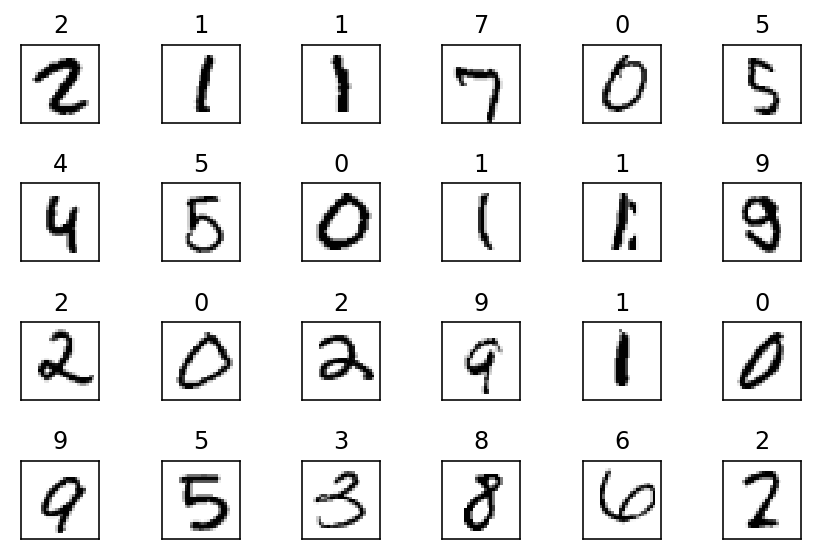

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.3 Data Preparation
* **Scikit-learn’s bundled datasets** were **preprocessed** into the **shapes its models required**
* MNIST dataset **requires some preparation** for use in a Keras convnet

<hr style="height:2px; border:none; color:black; background-color:black;">

### Reshaping the Image Data (1 of 2)
* **Keras convnets** require **NumPy array inputs** 
* Each **sample** must have the **shape**
> `(`**width**`,` **height**`,` **channels**`)`
* Each pixel has **one channel** (grayscale shade 0-255), so sample shapes will be 
> **`(28, 28, 1)`**
* As the **neural network learns** from the images, it **creates many more channels**
    * These channels will **represent more complex features**, like **edges**, **curves** and **lines**
    * Enable network to **recognize digits** based on these features and how they’re **combined**

### Reshaping the Image Data (1 of 2)
* NumPy array method `reshape` receives a tuple representing the new shape

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [15]:
X_test.shape

(10000, 28, 28, 1)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Normalizing the Image Data 
* **Numeric feature values** may vary widely
* Deep learning networks **perform better** on data that's **normalized** into
    * the range **0.0-1.0**, or 
    * a range for which the data’s **mean is 0.0** and its **standard deviation is 1.0**
        * S. Ioffe and Szegedy, C., “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.” https://arxiv.org/abs/1502.03167
* Divide **each pixel** value by **255** to normalize into the range **0.0-1.0**:

In [16]:
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.astype('float32') / 255

<hr style="height:2px; border:none; color:black; background-color:black;">

### One-Hot Encoding: Convert Labels to Categorical Data (1 of 2)
* **Predictions** for each digit will be an **array of 10 probabilities** 
* To **evaluate model accuracy**, Keras **compares predictions to dataset's labels**
    * Both must have the **same shape**
    * MNIST labels are **individual integers 0-9**
* Must **transform labels** into **categorical data arrays** matching the **prediction format**
* Use [**one-hot encoding**](https://en.wikipedia.org/wiki/One-hot) to convert labels from integers into 10-element **arrays of 1.0s and 0.0s** 
    * **only one element is 1.0** and the **rest are 0.0s**
* Categorical representation of a **7**
> <pre>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, <strong>1.0</strong>, 0.0, 0.0]</pre>
* **`tensorflow.keras.utils`** function **`to_categorical`** performs **one-hot encoding**

### One-Hot Encoding: Convert Labels to Categorical Data (2 of 2)
* Transform **`y_train`** and **`y_test`** into **two-dimensional arrays of categorical data**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.4 Creating the Neural Network
* Configure a **convolutional neural network**
* **`Sequential` model** stacks layers to **execute sequentially**
    * **output** of one layer becomes **input** to the next
    * **Feed-forward network**
    * Later, you’ll see that not all layers feed output to the next layer

In [24]:
from tensorflow.keras.models import Sequential 

In [25]:
cnn = Sequential() 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding Layers to the Network
* A typical **convnet** consists of 
	* **input layer** that receives **training samples**
	* **hidden layers** that **learn** from training samples
	* **output layer** that **produces predictions**
* Import layer classes for a basic **convnet**

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Convolution (1 of 5)
* We'll start with a **convolution layer**
* Uses the **relationships between pixels in close proximity** to learn useful **features** (or patterns) in small areas of each sample
* These **features** become **inputs** to **subsequent layers** 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Convolution (2 of 5)
* Examine convolution on a 6-by-6 image
* **3-by-3 shaded square** represents the **kernel**
* **Convolution** performs calculations that **learn** from kernel's **9** features, then **outputs 1 new feature** 
![Convolution diagram in which the 3-by-3 shaded square represents the kernel in its initial position](./ch15images/convolution.png "Convolution diagram in which the 3-by-3 shaded square represents the kernel in its initial position")

<hr style="height:2px; border:none; color:black; background-color:black;">

### Convolution (3 of 5)
* [**Kernels typically are 3-by-3**](https://www.quora.com/How-can-I-decide-the-kernel-size-output-maps-and-layers-of-CNN)
    * We found convnets that used **5-by-5** and **7-by-7** 
    * Kernel-size is a **hyperparameter**
* By looking at **features near one another**, the network begins to **recognize features** 
    * Like **edges**, **straight lines** and **curves**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Convolution (4 of 5)
* **Complete pass** left-to-right and top-to-bottom is called a **filter**
* For a **3-by-3 kernel**, the filter dimensions will be **two less than the input dimensions**
    * For each 28-by-28 MNIST image, the filter will be 26-by-26 
* **Number of filters** in the **convolutional layer** is commonly **32** or **64** for small images
* Each filter produces different results
* **Higher-resolution images** have **more features**, so they **require more filters**
* [**Keras team’s pretrained convnets**](https://github.com/keras-team/keras-applications/tree/master/keras_applications) use 64, 128 or even 256 filters in their **first convolutional layers**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Convolution (5 of 5)
* **Set of filters** produced by a **convolution layer** is called a **feature map**
* Subsequent **convolution layers** combine features from previous feature maps to **recognize larger features** and so on
	* In **facial recognition**, **early layers** might recognize **lines**, **edges** and **curves**, and **subsequent layers** might **combine** those into **features** like **eyes**, **eyebrows**, **noses**, **ears** and **mouths**
* After **learning a feature**, a network can **recognize that feature anywhere** in the **image**
    * One reason **convnets** are popular for **object recognition** in images

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a **`Conv2D`** Convolution Layer (1 of 2)

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

Instructions for updating:
Colocations handled automatically by placer.


* **`filters=64`**—The number of **filters** in the resulting **feature map**.
* **`kernel_size=(3, 3)`**—The **size of the kernel** used in each **filter**
* **`activation='relu'`**—**Rectified Linear Unit activation function** is used to produce this layer’s output
    * **Most widely used activation function** (Chollet, François. _Deep Learning with Python_. p. 72. Shelter Island, NY: Manning Publications, 2018)
    * [**Good for performance** because it’s **easy to calculate**](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02) 
    * [Commonly recommended for **convolutional layers**](https://www.quora.com/How-should-I-choose-a-proper-activation-function-for-the-neural-network) 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a **`Conv2D`** Convolution Layer (2 of 2)
* **First layer** in the model, so we specify the shape of each sample with `input_shape=(28, 28,1)` 
	* Creates an **input layer** to **load the samples** and pass them into the **`Conv2D` layer**, which is actually the **first hidden layer**
* Each subsequent layer **infers `input_shape`** from previous layer’s **output shape**
    * Makes it easy to **stack** layers

<hr style="height:2px; border:none; color:black; background-color:black;">

### Dimensionality of the First Convolution Layer’s Output
* Input samples are 28-by-28-by-1—that is, **784 features each**
* Specified **64 filters** and a **3-by-3 kernel** for the layer, so the **feature map size is 26-by-26-by-64** for a total of **43,264 features** 
	* **Significant increase in dimensionality** 
    * **Enormous** compared to numbers of features processed in our Machine Learning examples
* As each layer adds features, feature map **dimensionality** grows significantly
    * This is one of reason **deep learning** often requires **tremendous processing power**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Overfitting 
* Can occur when a **model is too complex** compared to what it is modeling
* **Most extreme case**: Model **memorizes** its training data's features
* **Overfitting** tends to occur in **deep learning** as the **dimensionality** becomes **too large** [\[1\]](https://cs231n.github.io/convolutional-networks/),[\[2\]](https://medium.com/@cxu24/why-dimensionality-reduction-is-important-dd60b5611543),[\[3\]](https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a)
* **Higher dimensionality** also increases (and sometimes explodes) **computation time**
* For deep learning on **CPUs**, training could become **intolerably slow**
* There are various techniques to **prevent overfitting** [\[1\]](https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d), [\[2\]](https://www.kdnuggets.com/2015/04/preventing-overfitting-neural-networks.html) &mdash; we'll use **pooling**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a Pooling Layer (1 of 3)
* To **reduce overfitting** and **computation time**, a **convolution layer** is often followed by one or more layers that **reduce dimensionality** of **convolution layer’s output**
* **Pooling compresses** (or **down-samples**) the results by **discarding features**
    * Helps make the model **more general**
* **Most common pooling technique** is called **max pooling**
	* Examines a 2-by-2 square of features and keeps only the maximum feature.

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a Pooling Layer (2 of 3)
* 2-by-2 blue square in position 1 represents the initial pool of features to examine:

![Max pooling diagram showing the 6-by-6 set of numeric values we wish to compress with the 2-by-2 blue square in position 1 representing the initial pool of features to examine, and the 3-by-3 square representing the results of max pooling](./ch15images/pooling.png "Max pooling diagram showing the 6-by-6 set of numeric values we wish to compress with the 2-by-2 blue square in position 1 representing the initial pool of features to examine, and the 3-by-3 square representing the results of max pooling")


<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a Pooling Layer (3 of 3)
* Outputs **maximum feature** from each pool
* **Pools do not overlap** 
* **Stride** for a 2-by-2 pool is **2**
* Every group of four features is reduced to one, so 2-by-2 pooling **compresses** number of features by **75%**
* Reduces previous layer’s output from **26-by-26-by-64** to **13-by-13-by-64**

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding Another Convolutional Layer and Pooling Layer
* **Convnets** often have **many convolution and pooling layers**. 
* [Keras team’s convnets](https://github.com/keras-team/keras-applications/tree/master/keras_applications) tend to **double** the number of **filters** in subsequent **convolutional layers** to enable the models to learn more relationships between the features

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

* **Input** to the **second convolution layer** is the 13-by-13-by-64 **output of the first pooling layer**
* **Output** of this **Conv2D layer** will be **11-by-11-by-128**
* For **odd dimensions** like 11-by-11, **Keras pooling layers round down** by default (in this case to 10-by-10), so this pooling layer’s **output** will be **5-by-5-by-128**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Flattening the Results to One Dimension with a Keras **`Flatten`** Layer
* Model's **final output** will be a **one-dimensional** array of 10 probabilities that classify the digits
* To prepare for **one-dimensional final predictions**, need to **flatten** the previous layer’s output to **one dimension**
* **`Flatten`** layer's output will be **1-by-3200** (5 &#215; 5 &#215; 128)

In [31]:
cnn.add(Flatten())

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a Dense Layer to Reduce the Number of Features
* Layers before the **`Flatten`** layer **learned digit features**
* Now must **learn the relationships among those features** to **classify** which digit each image represents
* Accomplished with **fully connected `Dense` layers**
* The following **`Dense` layer** creates **128 neurons (`units`)** that **learn** from the 3200 outputs of the previous layer

In [32]:
cnn.add(Dense(units=128, activation='relu'))

* Many **convnets** contain **at least one `Dense` layer** 
* **Convnets** geared to more complex image datasets with higher-resolution images like [**ImageNet**](http://www.image-net.org)—a dataset of over 14 million images—often have **several `Dense` layers**, commonly with **4096 neurons**
* See the [Keras pretrained ImageNet convnets' code](https://github.com/keras-team/keras-applications/tree/master/keras_applications)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding Another Dense Layer to Produce the Final Output
* Final **`Dense`** layer **classifies** inputs into **neurons** representing the classes **0-9**
* The **`softmax` activation function** converts values of these 10 neurons into **classification probabilities**
* **Neuron** with **highest probability** represents the **prediction** for a given digit image

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

<hr style="height:2px; border:none; color:black; background-color:black;">

### Printing the Model’s Summary with the Model’s **`summary`** Method
* Note layers' **output shapes** and **numbers of parameters**
* **Parameters** are the **weights** that the network **learns** during training [\[1\]](https://hackernoon.com/everything-you-need-to-know-about-neural-networks-8988c3ee4491),[\[2\]](https://www.kdnuggets.com/2018/06/deep-learning-best-practices-weight-initialization.html) 
* **Relatively small network**, but needs to **learn nearly 500,000 parameters**! 
	* This is for **tiny images** that are less than 1/4 the size of icons on smartphone home screens
	* Imagine how many features a network would have to learn to process high-resolution 4K video frames or the super-high-resolution images produced by today’s digital cameras 
* In the **`Output Shape`** column, **`None`** means the model does not know in advance how many training samples you’re going to provide

In [34]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

### Visualizing a Model’s Structure with the **`plot_model` Function** from Module `tensorflow.keras.utils`
* [See our discussion of `plot_model`](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_30)

<hr style="height:2px; border:none; color:black; background-color:black;">

### Compiling the Model (1 of 2)
* Complete the model by calling its **`compile` method**

In [35]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

<hr style="height:2px; border:none; color:black; background-color:black;">

### Compiling the Model (2 of 2)
* **`optimizer='adam'`**—The **optimizer** this model uses to **adjust the weights** throughout the neural network **as it learns**
	* [**Keras optimizers**](https://keras.io/optimizers/)
	* `'adam'` performs well across a wide variety of models [\[1\]](https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2),[\[2\]](https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f)
* **`loss='categorical_crossentropy'`**—The **loss function** used by the optimizer in **multi-classification networks** (ours predicts 10 classes)
	* **Optimizer** attempts to **minimize the values returned by the loss function** 
	* For **binary classification**, Keras provides **`'binary_crossentropy'`**, and for **regression**, **`'mean_squared_error'`**
	* [Other loss functions](https://keras.io/losses/)
* **`metrics=['accuracy']`**—List of **metrics** the network will produce to help you **evaluate the model**
	* **Accuracy** commonly used in **classification models**
	* We’ll use it to check **percentage of correct predictions**
	* [Other metrics](https://keras.io/metrics/)

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.5 Training and Evaluating the Model (1 of 3)
* **Train a Keras model** by calling its **`fit` method**
```python
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
```
* **`epochs=5`**&mdash;train neural networks iteratively over time
    * Each **`epoch`** processes **every training dataset sample** once
    * **Hyperparameter** that may need tuning
* **`batch_size=64`**&mdash;**number of samples to process at a time**
    * Most models specify a **power of 2 from 32 to 512**
* [**`validation_split=0.1`**&mdash;model should reserve the **last** 10% of the training samples for validation](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed) 
	* After each **epoch**, model uses validation samples to **make predictions** and display the **validation loss and accuracy** 
    * Use **tune your layers** and the **`fit` method’s hyperparameters**, or possibly change the **layer composition** of your model
    * Can specify **separate validation data** with **`validation_data` argument** 

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.5 Training and Evaluating the Model (2 of 3)
* Model took about 5 minutes to train on our CPU.
* **Lecture note: Play convnet timelapse video here**

In [36]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
54000/54000 [==============================] - 30s 560us/sample - loss: 0.1482 - acc: 0.9547 - val_loss: 0.0532 - val_acc: 0.9852
Epoch 2/5
54000/54000 [==============================] - 36s 668us/sample - loss: 0.0445 - acc: 0.9857 - val_loss: 0.0449 - val_acc: 0.9873
Epoch 3/5
54000/54000 [==============================] - 40s 738us/sample - loss: 0.0302 - acc: 0.9908 - val_loss: 0.0360 - val_acc: 0.9887
Epoch 4/5
54000/54000 [==============================] - 40s 739us/sample - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0372 - val_acc: 0.9895
Epoch 5/5
54000/54000 [==============================] - 40s 743us/sample - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0367 - val_acc: 0.9908


<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.5 Training and Evaluating the Model (3 of 3)
* As training proceeds, **`fit`** shows the **progress** of each **epoch**, **how long** the epoch took to execute, and the **evaluation metrics** for that epoch
* Impressive **training accuracy (`acc`**) and **validation accurracy (`acc`)**, given that **we have not yet tried to tune the hyperparameters** or **tweak the number and types of the layers**

<!--* In the following sample output, we highlighted the training accuracy (`acc`) and validation accuracy (`val_acc`) in bold: 

```
Train on 54000 samples, validate on 6000 samples  
Epoch 1/5  
54000/54000 [==============================] - 68s 1ms/step - loss: 0.1407 - **acc: 0.9580** - val_loss: 0.0452 - **val_acc: 0.9867**  
Epoch 2/5  
54000/54000 [==============================] - 64s 1ms/step - loss: 0.0426 - **acc: 0.9867** - val_loss: 0.0409 - val_acc: **0.9878**  
Epoch 3/5  
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0299 - **acc: 0.9902** - val_loss: 0.0325 - **val_acc: 0.9912**   
Epoch 4/5  
54000/54000 [==============================] - 70s 1ms/step - loss: 0.0197 - **acc: 0.9935** - val_loss: 0.0335 - **val_acc: 0.9903**  
Epoch 5/5  
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0155 - **acc: 0.9948** - val_loss: 0.0297 - **val_acc: 0.9927**
```-->

<hr style="height:2px; border:none; color:black; background-color:black;">

### Evaluating the Model on Unseen Data with Model’s **`evaluate` Method**

In [37]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 295us/sample - loss: 0.0258 - acc: 0.9919


In [38]:
loss

0.02575629955956574

In [39]:
accuracy

0.9919

* Without tuning, our **convnet model** is **99+% accurate** for **unseen data samples**
    * Can find models online that predict MNIST with even **higher accuracy**
    * **Experiment** with different numbers of layers, types of layers and layer parameters and observe how those changes affect your results

<hr style="height:2px; border:none; color:black; background-color:black;">

### Making Predictions with the Model’s **`predict` Method** 

In [40]:
predictions = cnn.predict(X_test)

* The first digit should be a 7 (shown as `1.` at index 7)

In [41]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

* Check the **probabilities** returned by **`predict`** for **first test sample**

In [42]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000001059%
1: 0.0000001742%
2: 0.0001622302%
3: 0.0000286311%
4: 0.0000000100%
5: 0.0000001869%
6: 0.0000000000%
7: 99.9997496605%
8: 0.0000027779%
9: 0.0000612421%


* Our model believes this digit is a 7 with **nearly** 100% certainty
* Not all predictions have this level of certainty

<hr style="height:2px; border:none; color:black; background-color:black;">

### Locating the Incorrect Predictions (1 of 2)
* View some **incorrectly predicted images** to get a sense of digits **our model has trouble with**
	* If the model always mispredicts 8s, perhaps we need more 8s in our training data
* To determine whether a prediction was correct, compare the index of the largest probability in `predictions[0]` to the index of the element containing **`1.0` in `y_test[0]`**
	* If **indices** are the same, **prediction was correct**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Locating the Incorrect Predictions (2 of 2)
* **Reshape the samples** from the shape `(28, 28, 1)` that Keras required for learning back to `(28, 28)`, which **Matplotlib requires to display the images**

In [43]:
images = X_test.reshape((10000, 28, 28))

In [44]:
incorrect_predictions = []

* In the following snippet, **`p`** is the **predicted value array**, and **`e`** is the **expected value array**
* **NumPy’s `argmax` function** determines **index** of an array’s **highest valued element**

In [45]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [46]:
len(incorrect_predictions)  # number of incorrect predictions

81

<hr style="height:2px; border:none; color:black; background-color:black;">

### Visualizing Incorrect Predictions
* **Display 24 of the incorrect images** labeled with each image’s index, predicted value (`p`) and expected value (`e`)
* Before reading the **expected values**, look at each digit and write down what digit you think it is
* This is an important part of **getting to know your data**
<!--![24 incorrectly predicted digit images](./ch15images/incorrect24.png "24 incorrectly predicted digit images")-->

 

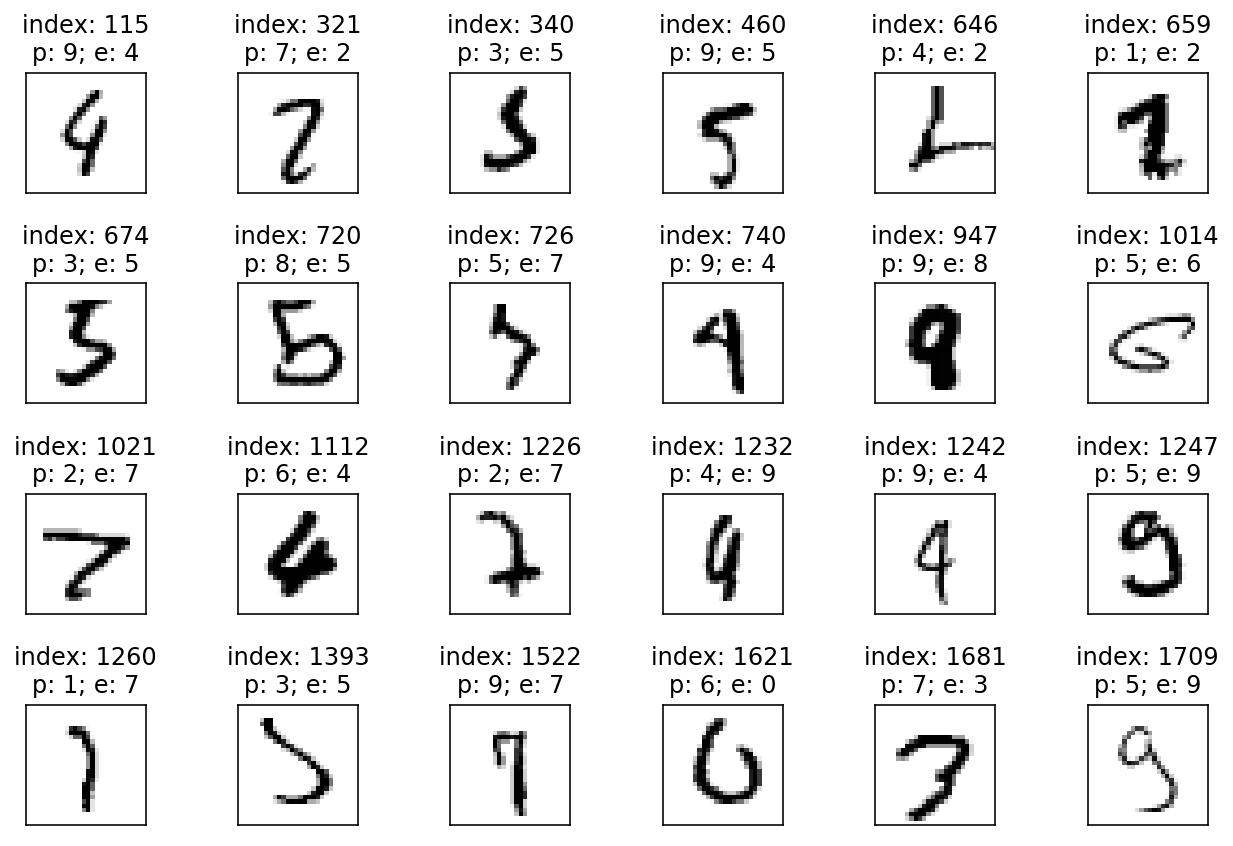

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 6))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying the Probabilities for Several Incorrect Predictions
* The following function displays the probabilities for the specified prediction array:

In [48]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [49]:
display_probabilities(predictions[321])

0: 0.0007741451%
1: 0.0608033966%
2: 10.5035677552%
3: 0.0049726084%
4: 0.0000003466%
5: 0.0000086907%
6: 0.0000000517%
7: 89.2553329468%
8: 0.1640649512%
9: 0.0104848608%


In [50]:
display_probabilities(predictions[1393])

0: 0.0003872744%
1: 0.0039345989%
2: 0.0000796605%
3: 98.4814345837%
4: 0.0000303171%
5: 1.1240107007%
6: 0.0002855059%
7: 0.0037641941%
8: 0.3839959390%
9: 0.0020704379%


<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.6.6 Saving and Loading a Model (1 of 2)
* Can **save state** of a model
* Can **load it later** to 
    * Make more predictions
    * Train more
    * Train for new problems
    * **Transfer learning** to a new model [\[1\]](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751), [\[2\]](https://medium.com/nanonets/nanonets-how-to-use-deep-learning-when-you-have-limited-data-f68c0b512cab)

## 15.6.6 Saving and Loading a Model (2 of 2)
* Can store **model architecture** and **state** in a **Hierarchical Data Format (HDF5)** file for later use

In [ ]:
cnn.save('mnist_cnn.h5')

* Load a saved model 

> ```python
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')


* Can then invoke its methods
    * Could call **`predict`** to make **additional predictions on new data**
    * Could call **`fit`** to **train with additional data**
* [Additional functions that enable you to **save and load various aspects of your models**](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model)

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.7 Visualizing Neural Network Training with TensorBoard
* Visualization tools like Google's [**TensorBoard**](https://github.com/tensorflow/tensorboard/blob/master/README.md) ([\[1\]](https://www.tensorflow.org/guide/summaries_and_tensorboard)) can help you gain insights into what goes on under the hood in deep learning

![TensorBoard visualization of a 10-epoch run of our MNIST convnet](./ch15images/tensorboard.png "TensorBoard visualization of a 10-epoch run of our MNIST convnet")

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.8 ConvnetJS: Browser-Based Deep-Learning Training and Visualization 
* [**Karpathy’s ConvnetJS MNIST demo presents a scrollable dashboard** that updates dynamically as the model trains](https://cs.stanford.edu/people/karpathy/convnetjs/)

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.9 Recurrent Neural Networks for Sequences; Sentiment Analysis with the IMDb Dataset (1 of 4)
**\[NOTE: I cover this case study in detail only if we have time in this webinar (we typically don't). See my [12-video presentation of this case study on O'Reilly Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_41) for a complete explanation.\]**
&nbsp;  
&nbsp;  

* **IMDb (the Internet Movie Database) movie reviews dataset** 
    * Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher, "Learning Word Vectors for Sentiment Analysis," _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_, June 2011. Portland, Oregon, USA. Association for Computational Linguistics, pp. 142–150. http://www.aclweb.org/anthology/P11-1015.
* Perform **binary classification** to **predict** whether a review’s **sentiment** is **positive** or **negative**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.9 Recurrent Neural Networks for Sequences; Sentiment Analysis with the IMDb Dataset (2 of 4)
* **Recurrent neural networks (RNNs)** process **sequences of data**
    * time series
    * text in sentences
* **“Recurrent”** because the **neural network contains loops**
    * **Output of a given layer** becomes the **input to that same layer** in the **next time step**
* **Time step**
    * **Next point in time** for a **time series**
    * **Next word in a sequence of words** for a **text sequence**
* **Loops in RNNs** help them **learn relationships** among data in the sequence

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.9 Recurrent Neural Networks for Sequences; Sentiment Analysis with the IMDb Dataset (3 of 4)
* **“Good”** on its own has **positive sentiment**
* **“Not good”** has **negative sentiment** 
    * **“not”** is **earlier** in the sequence 
* **RNNs** take into account the **relationships** among **earlier** and **later** data in a sequence
* When determining text's meaning, there can be **many words to consider** and an **arbitrary number of words between them**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.9 Recurrent Neural Networks for Sequences; Sentiment Analysis with the IMDb Dataset (4 of 4)
* **Long Short-Term Memory (LSTM)** layer makes the neural network **recurrent** 
* Optimized to handle **learning from sequences**
* RNNs have been used for many tasks including:[\[1\]](https://www.analyticsindiamag.com/overview-of-recurrent-neural-networks-and-their-applications/),[\[2\]](https://en.wikipedia.org/wiki/Recurrent_neural_network#Applications),[\[3\]](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
    * **predictive text input**—displaying possible next words as you type,
    * **sentiment analysis**
    * **responding to questions with predicted best answers** from a corpus
    * **inter-language translation**
    * **automated video closed captioning** &mdash; **speech recognition**
    * **speech synthesis**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.1 Loading the IMDb Movie Reviews Dataset (1 of 2)
* Contains **25,000 training samples** and **25,000 testing samples**, each **labeled** with its positive (1) or negative (0) sentiment

In [ ]:
from tensorflow.keras.datasets import imdb

* **Over 88,000 unique words** in the dataset
* Can specify **number of unique words to import** when loading **training and testing data**
* We'll use top **10,000 most frequently occurring words** 
    * Due to **system memory limitations** and **training on a CPU** (intentionally)
    * Most people don't have systems with Tensorflow-compatible **GPUs** or **TPUs**
* **More data** takes **longer to train**, but may produce **better models**

## 15.9.1 Loading the IMDb Movie Reviews Dataset (1 of 2)
* **`load_data`** **replaces** any words **outside the top 10,000** with a **placeholder** value (discussed shortly)

In [ ]:
number_of_words = 10000

**NOTE:** Following cell was added to work around a **known issue with TensorFlow/Keras and NumPy**&mdash;this issue is already fixed in a forthcoming version. [See this cell's code on StackOverflow.](https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa)

In [ ]:
#import numpy as np

In [ ]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(
    num_words=number_of_words)

In [ ]:
# This cell completes the workaround mentioned above
# restore np.load for future normal usage
#np.load = np_load_old

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.2 Data Exploration (1 of 2)
* Check sample and target dimensions
* **Note that `X_train` and `X_test` appear to be one-dimensional**
    * They're actually **NumPy arrays of objects** (lists of integers)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.2 Data Exploration (2 of 2)
* The **arrays `y_train` and `y_test`** are **one-dimensional** arrays containing **1s and 0s**, indicating whether each review is **positive** or **negative**
* `X_train` and `X_test` are **lists** of integers, each representing one review’s contents
* **Keras models require numeric data** &mdash; **IMDb dataset is preprocessed for you**

In [ ]:
%pprint  # toggle pretty printing, so elements don't display vertically

In [ ]:
X_train[123]

<hr style="height:2px; border:none; color:black; background-color:black;">

### Movie Review Encodings (1 of 2)
* Because the **movie reviews** are **numerically encoded**, to view their original text, you need to know the word to which each number corresponds
* **Keras’s IMDb dataset** provides a **dictionary** that **maps the words to their indexes**
* **Each word’s value** is its **frequency ranking** among all words in the dataset
    * **Ranking 1** is the **most frequently occurring word**
    * **Ranking 2** is the **second most frequently occurring word**
    * ...

<hr style="height:2px; border:none; color:black; background-color:black;">

### Movie Review Encodings (3 of 3)
* Ranking values are **offset by 3** in the training/testing samples
    * **Most frequently occurring word has the value 4** wherever it appears in a review
* **0, 1 and 2** in each encoded review are **reserved**:
    * **padding (0)** 
        * All training/testing samples **must have same dimensions**
        * Some reviews may need to be padded with **0** and some shortened
    * **start of a sequence (1)** &mdash; a **token** that Keras uses internally for learning purposes
    * **unknown word (2)** &mdash; typically a word that was **not loaded**
        * **`load_data`** uses **2** for words with **frequency rankings greater than `num_words`** 

<hr style="height:2px; border:none; color:black; background-color:black;">

### Decoding a Movie Review (1 of 3)
* [Detailed discussion in **Python Fundamentals LiveLessons**](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_44)
* Must account for offset when **decoding reviews**
* Get the **word-to-index dictionary**

In [ ]:
word_to_index = imdb.get_word_index()

* The word `'great'` might appear in a positive movie review:

In [ ]:
word_to_index['great']  # 84th most frequent word

<hr style="height:2px; border:none; color:black; background-color:black;">

### Decoding a Movie Review (2 of 3)
* **Reverse `word_to_index` mapping**, so we can **look up words** by **frequency rating**

In [ ]:
index_to_word = {index: word for (word, index) in word_to_index.items()}

* **Top 50 words**—**most frequent word** has the key **1** in the **new dictionary**

In [ ]:
[index_to_word[i] for i in range(1, 51)]

<hr style="height:2px; border:none; color:black; background-color:black;">

### Decoding a Movie Review (3 of 3)
* Now, we can **decode a review**
* **`i - 3`** accounts for the **frequency ratings offsets** in the encoded reviews 
* For `i` values `0`–`2`, `get` returns `'?'`; otherwise, `get` returns the word with the **key `i - 3`** in the **`index_to_word` dictionary**

In [ ]:
' '.join([index_to_word.get(i - 3, '?') for i in X_train[123]])

* Can see from **`y_train[123]`** that this **review** is **classified as positive**

In [ ]:
y_train[123]

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.3 Data Preparation (1 of 2)
* Number of words per review varies
* Keras **requires all samples to have the same dimensions**
* **Prepare data** for learning
	* Restrict every review to the **same number of words**
	* **Pad** some with **0s**, **truncate** others
* **`pad_sequences` function** reshapes samples and **returns a 2D array**

In [ ]:
words_per_review = 200  

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train = pad_sequences(X_train, maxlen=words_per_review)

In [ ]:
X_train.shape

## 15.9.3 Data Preparation (2 of 2)
* Must also **reshape `X_test`** for evaluating the model later

In [ ]:
X_test = pad_sequences(X_test, maxlen=words_per_review) 

In [ ]:
X_test.shape

<hr style="height:2px; border:none; color:black; background-color:black;">

### Splitting the Test Data into Validation and Test Data
* Split the **25,000 test samples** into **20,000 test samples** and **5,000 validation samples**
* We'll pass validation samples to the model’s `fit` method via **`validation_data`** argument
* Use **Scikit-learn’s `train_test_split` function** 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, random_state=11, test_size=0.20) 

* Confirm the split by checking `X_test`’s and `X_val`’s shapes:

In [ ]:
X_test.shape

In [ ]:
X_val.shape

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.4 Creating the Neural Network
* Begin with a **`Sequential` model** and import the other layers

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
rnn = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding an Embedding Layer (1 of 3)
* Our convnet example used **one-hot encoding** to convert the **MNIST’s integer labels** into **categorical** data
    * **Result for each label** was a **vector** in which **all but one element was 0**
* Could do that for index values that represent words, but with **10,000 unique words**:
	* Need a **10,000-by-10,000 array** to represent all words
	* **100,000,000 elements** and **almost all** would be **0**
	* For **all 88,000+ unique words** in the dataset, need nearly **eight billion elements**!

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding an Embedding Layer (2 of 3)
* To **reduce dimensionality**, RNNs that process **text sequences** typically begin with an **embedding layer** 
* Encodes each word in a more compact **dense-vector representation**
* These capture the **word’s context**—how a given word **relates to words around it**
* Help **RNN learn word relationships** 
* **Predefined word embeddings**, such as **Word2Vec** and **GloVe**
	* Can **load** into neural networks to **save training time**
	* Sometimes used to **add basic word relationships** to a model when **smaller amounts of training data** are available
	* **Improve model accuracy** by **building upon previously learned word relationships**, rather than trying to learn those relationships with insufficient data

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding an `Embedding` Layer (3 of 3)

In [ ]:
rnn.add(Embedding(input_dim=number_of_words, output_dim=128,
                  input_length=words_per_review))

* **`input_dim=number_of_words`**—Number of **unique words**
* **`output_dim=128`**—Size of each word embedding
    * If you [load pre-existing embeddings](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html) like **Word2Vec** and **GloVe**, you must set this to **match the size of the word embeddings you load**
* **`input_length=words_per_review`**—Number of words in each input sample

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding an LSTM Layer
* **Mechanics of how the LSTM layer performs its task are beyond scope**.
    * Chollet says: “you don’t need to understand anything about the specific architecture of an LSTM cell; **as a human, it shouldn’t be your job to understand it**. Just keep in mind what the LSTM cell is meant to do: allow past information to be reinjected at a later time.”
    * Chollet, François. _Deep Learning with Python_. p. 204. Shelter Island, NY: Manning Publications, 2018.

In [ ]:
rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

* **`units`**—**number of neurons** in the layer
	* **More neurons** means **network can remember more**
	* [**Guideline**](https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046): Value between **length of the sequences** (200 in this example) and **number of classes to predict** (2 in this example)
* **`dropout`**—**percentage of neurons to randomly disable** when processing the layer’s input and output
	* Like **pooling layers** in a **convnet**, **dropout** is a proven technique that **reduces overfitting**
        * Yarin, Ghahramani, and Zoubin. “A Theoretically Grounded Application of Dropout in Recurrent Neural Networks.” October 05, 2016. https://arxiv.org/abs/1512.05287
        * Srivastava, Nitish, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, and Ruslan Salakhutdinov. “Dropout: A Simple Way to Prevent Neural Networks from Overfitting.” _Journal of Machine Learning Research_ 15 (June 14, 2014): 1929-1958. http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
	* Keras also provides a **`Dropout`** layer that you can add to your models 
* **`recurrent_dropout`**—**percentage of neurons to randomly disable** when the **layer’s output** is **fed back into the layer** again to allow the network to **learn from what it has seen previously**

<hr style="height:2px; border:none; color:black; background-color:black;">

### Adding a Dense Output Layer 
* Reduce the **LSTM layer’s output** to **one result** indicating whether a review is **positive** or **negative**, thus the value **`1` for the `units` argument**
* **`'sigmoid`' activation function** is preferred for **binary classification**
	* Chollet, François. _Deep Learning with Python_. p.114. Shelter Island, NY: Manning Publications, 2018.
	* Reduces arbitrary values into the range **0.0–1.0**, producing a probability

In [ ]:
rnn.add(Dense(units=1, activation='sigmoid'))

<hr style="height:2px; border:none; color:black; background-color:black;">

### Compiling the Model and Displaying the Summary
* **Two possible outputs**, so we use the **`binary_crossentropy` loss function**:

In [ ]:
rnn.compile(optimizer='adam',
            loss='binary_crossentropy', 
            metrics=['accuracy'])

* **Fewer layers** than our **convnet**, but nearly **three times as many parameters** (the network’s **weights**)  
	* **More parameters means more training time**
	* The large number of parameters primarily comes from the **number of words in the vocabulary** (we loaded 10,000) **times the number of neurons in the `Embedding` layer’s output (128)**

In [ ]:
rnn.summary()

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.9.5 Training and Evaluating the Model (1 of 2)
* For each **epoch** the **RNN model** takes **significantly longer to train** than our **convnet**
    * Due to the **larger numbers of parameters** (weights) our **RNN model** needs to learn

In [ ]:
rnn.fit(X_train, y_train, epochs=10, batch_size=32, 
        validation_data=(X_val, y_val))

<!--
```
Train on 25000 samples, validate on 20000 samples
WARNING:tensorflow:From /Users/pauldeitel/anaconda3/envs/tf_env/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
25000/25000 [==============================] - 297s 12ms/sample - loss: 0.4827 - acc: 0.7673 - val_loss: 0.3925 - val_acc: 0.8324
Epoch 2/10
25000/25000 [==============================] - 291s 12ms/sample - loss: 0.3327 - acc: 0.8618 - val_loss: 0.3614 - val_acc: 0.8461
Epoch 3/10
25000/25000 [==============================] - 272s 11ms/sample - loss: 0.2662 - acc: 0.8937 - val_loss: 0.3503 - val_acc: 0.8492
Epoch 4/10
25000/25000 [==============================] - 272s 11ms/sample - loss: 0.2066 - acc: 0.9198 - val_loss: 0.3695 - val_acc: 0.8623
Epoch 5/10
25000/25000 [==============================] - 271s 11ms/sample - loss: 0.1612 - acc: 0.9403 - val_loss: 0.3802 - val_acc: 0.8587
Epoch 6/10
25000/25000 [==============================] - 291s 12ms/sample - loss: 0.1218 - acc: 0.9556 - val_loss: 0.4103 - val_acc: 0.8421
Epoch 7/10
25000/25000 [==============================] - 295s 12ms/sample - loss: 0.1023 - acc: 0.9634 - val_loss: 0.4634 - val_acc: 0.8582
Epoch 8/10
25000/25000 [==============================] - 273s 11ms/sample - loss: 0.0789 - acc: 0.9732 - val_loss: 0.5103 - val_acc: 0.8555
Epoch 9/10
25000/25000 [==============================] - 273s 11ms/sample - loss: 0.0676 - acc: 0.9775 - val_loss: 0.5071 - val_acc: 0.8526
Epoch 10/10
25000/25000 [==============================] - 273s 11ms/sample - loss: 0.0663 - acc: 0.9787 - val_loss: 0.5156 - val_acc: 0.8536
<tensorflow.python.keras.callbacks.History object at 0x141462e48>
```
-->

## 15.9.5 Training and Evaluating the Model (2 of 2)
* Function **`evaluate`** returns the **loss and accuracy values**

In [ ]:
results = rnn.evaluate(X_test, y_test)

In [ ]:
results

* **Accuracy seems low** compared to our **convnet**, but this is a **much more difficult problem**
    * Many **IMDb sentiment-analysis binary-classification studies** show results **in the high 80s**
* We did **reasonably well** with our **small recurrent neural network** of only **three layers**
    * We have not tried to tune our model

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.10 Tuning Deep Learning Models 
* See the video: https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson15_53
* **Testing accuracy** and **validation accuracy** were **significantly less** than the **training accuracy**
    * Usually due to **overfitting**, so we have **room for improvement** [\[1\]](https://towardsdatascience.com/deep-learning-overfitting-846bf5b35e24),[\[2\]](https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42)
* Each **epoch's output** shows **training** and **validation accuracy** increasing
    * **Possible we have not yet trained enough**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.10 Tuning Deep Learning Models (2 of 4)
* Some **variables** that affect your **model performance**:
    * having **more or less data to train with**
    * having **more or less data to test with** 
    * having **more or less data to validate with** 
    * having **more or fewer layers**
    * the **types of layers** you use
    * the **order of the layers**

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.10 Tuning Deep Learning Models (3 of 4)
* Some **things we could tune** include: 
    * trying **different amounts of training data**—we used only the top 10,000 words
    * different **numbers of words per review**—we used only 200
    * different **numbers of neurons** in our layers
    * **more layers** 
    * **loading pre-trained word vectors** rather than learning them from scratch 

<hr style="height:2px; border:none; color:black; background-color:black;">

# 15.10 Tuning Deep Learning Models (4 of 4)
* The **compute time** required to train models multiple times is **significant** so, in **deep learning**, you generally **do not tune hyperparameters** with techniques like **k-fold cross-validation** [\[1\]](https://www.quora.com/Is-cross-validation-heavily-used-in-deep-learning-or-is-it-too-expensive-to-be-used)
* One promising area for tuning is **automated machine learning (AutoML)** [\[1\]](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a),[\[2\]](https://medium.com/machine-learning-bites/deeplearning-series-deep-neural-networks-tuning-and-optimization-39250ff7786d),[\[3\]](https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html),[\[4\]](https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html),[\[5\]](https://towardsdatascience.com/a-comprehensive-guide-on-how-to-fine-tune-deep-neural-networks-using-keras-on-google-colab-free-daaaa0aced8f)
    * [**Auto-Keras**](https://autokeras.com/) is geared to **automatically choosing** the **best Keras model configurations** 
    * Others include **Google’s Cloud AutoML** and **Baidu’s EZDL** 

<hr style="height:2px; border:none; color:black; background-color:black;">

# More Info 
* See Lesson 15 in [**Python Fundamentals LiveLessons** here on O'Reilly Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 15 in [**Python for Programmers** on O'Reilly Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* See Chapter 16 in [**Intro Python for Computer Science and Data Science** on O'Reilly Online Learning](https://learning.oreilly.com/library/view/intro-to-python/9780135404799/)
* Interested in a print book? Check out:

| Python for Programmers<br>(640-page professional book) | Intro to Python for Computer<br>Science and Data Science<br>(880-page college textbook)
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

<hr style="height:2px; border:none; color:black; background-color:black;">